# **TASK 1**: LINEAR REGRESSION

Linear Regression Model with Gradient Descent Optimization

Import Libraries and Dataset


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset
url = 'https://raw.githubusercontent.com/lmurayire12/linear_regression_model/refs/heads/main/dataset.csv'
data = pd.read_csv('https://raw.githubusercontent.com/lmurayire12/linear_regression_model/refs/heads/main/dataset.csv')

# Display first few rows of dataset
data.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Defining X_train, X_test, y_train, y_test

In [5]:
X = data[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']]
y = data['pm2.5']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Data Processing**

In [6]:
# Checking for missing values
print(data.isnull().sum())

# Handling missing values (eg: removing rows with missing pm2.5)
data = data.dropna(subset=['pm2.5'])

# Confirm missing values are removed
data.isnull().sum()


No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


**Selecting Features & Target**

In your dataset:

**Target variable**: pm2.5

**Potential Features**: DEWP, TEMP, PRES, Iws, Is, Ir

In [7]:
# Selecting features and target variable
X = data[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']]
y = data['pm2.5']

# Spliting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Building Linear Regression Model**

In [8]:
# Initializing and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test data
predictions = model.predict(X_test)


**Evaluating Model Performance**


In [13]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the SGDRegressor on scaled data
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, learning_rate='constant', random_state=42)
sgd_model.fit(X_train_scaled, y_train)

# Predictions with scaled features
sgd_predictions = sgd_model.predict(X_test_scaled)

# Evaluate again after scaling
sgd_mse = mean_squared_error(y_test, sgd_predictions)
sgd_r2 = r2_score(y_test, sgd_predictions)

print("\nLinear Regression (SGD after scaling) Evaluation:")
print(f"MSE: {sgd_mse:.2f}")
print(f"R-squared: {sgd_r2:.2f}")


Linear Regression (SGD after scaling) Evaluation:
MSE: 6997.48
R-squared: 0.21


In [10]:
# Linear Regression using Gradient Descent (SGDRegressor)
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, learning_rate='constant', random_state=42)
sgd_model.fit(X_train, y_train)

# Predictions
sgd_predictions = sgd_model.predict(X_test)

# Evaluate performance
sgd_mse = mean_squared_error(y_test, sgd_predictions)
sgd_r2 = r2_score(y_test, sgd_predictions)

print("\nLinear Regression with Gradient Descent Evaluation:")
print(f"MSE: {sgd_mse:.2f}")
print(f"R-squared: {sgd_r2:.2f}")



Linear Regression with Gradient Descent Evaluation:
MSE: 15689068188711143959013128929280.00
R-squared: -1780518806367825925815402496.00


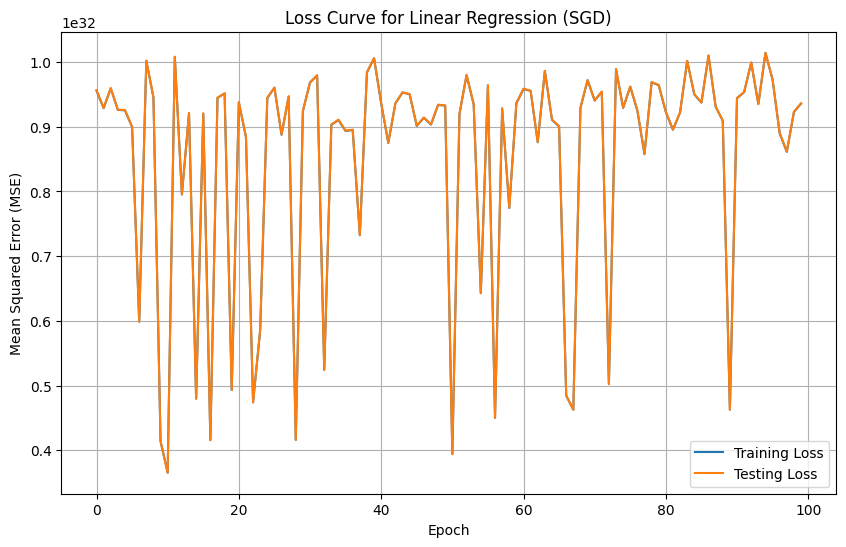

In [11]:
# Loss curves for SGDRegressor
sgd_model = SGDRegressor(max_iter=1, tol=None, eta0=0.01, learning_rate='constant', random_state=42, warm_start=True)

epochs = 100
train_losses, test_losses = [], []

for epoch in range(epochs):
    sgd_model.fit(X_train, y_train)

    train_loss = mean_squared_error(y_train, sgd_model.predict(X_train))
    test_loss = mean_squared_error(y_test, sgd_model.predict(X_test))

    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss Curve for Linear Regression (SGD)')
plt.legend()
plt.grid(True)
plt.show()


**Visualization**

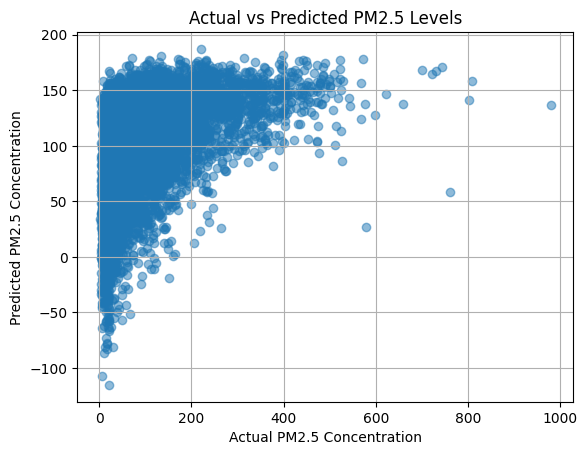

In [ ]:
# Actual vs Predicted plot
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.title('Actual vs Predicted PM2.5 Levels')
plt.grid(True)
plt.show()


 **Model Comparison (Linear Regression, Decision Tree, Random Forest)**

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)


In [15]:
# Existing models already trained above:
# Linear Regression (OLS): mse, r2
# SGD Linear Regression: sgd_mse, sgd_r2
# Decision Tree: dt_mse, dt_r2
# Random Forest: rf_mse, rf_r2

# Updated comparison results
print("\nUpdated Model Performance Comparison:")
print(f"Linear Regression (OLS): MSE={mse:.2f}, R²={r2:.2f}")
print(f"Linear Regression (Gradient Descent): MSE={sgd_mse:.2f}, R²={sgd_r2:.2f}")
print(f"Decision Tree: MSE={dt_mse:.2f}, R²={dt_r2:.2f}")
print(f"Random Forest: MSE={rf_mse:.2f}, R²={rf_r2:.2f}")

# Determine best-performing model (lowest MSE)
model_mse = {
    'Linear Regression (OLS)': mse,
    'Linear Regression (SGD)': sgd_mse,
    'Decision Tree': dt_mse,
    'Random Forest': rf_mse
}

best_model_name = min(model_mse, key=model_mse.get)
print(f"\nBest-performing model based on MSE: {best_model_name}")



Updated Model Performance Comparison:
Linear Regression (OLS): MSE=6765.37, R²=0.23
Linear Regression (Gradient Descent): MSE=6997.48, R²=0.21
Decision Tree: MSE=6534.01, R²=0.26
Random Forest: MSE=6378.68, R²=0.28

Best-performing model based on MSE: Random Forest


**Save the best perfoming model**

In [ ]:
import joblib

# Assuming Random Forest performed best:
joblib.dump(rf_model, 'best_model.pkl')


['best_model.pkl']

 **Prediction**

In [ ]:
# Corrected Prediction Script (to avoid the feature name warning)
import joblib
import pandas as pd

# Load the best model
model = joblib.load('best_model.pkl')

# Example new data with the same feature names as training
new_data = pd.DataFrame({
    'DEWP': [2],
    'TEMP': [10.0],
    'PRES': [1012.0],
    'Iws': [3.5],
    'Is': [0],
    'Ir': [0]
})

# Make prediction
predicted_pm25 = model.predict(new_data)
print(f'Predicted PM2.5 concentration: {predicted_pm25[0]:.2f}')


Predicted PM2.5 concentration: 84.60
